In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
owners = pd.read_csv('owners.csv')
pets = pd.read_csv('pets.csv')
procedure_details = pd.read_csv('procedure_details.csv')
procedures = pd.read_csv('procedures.csv')

# Which pet (enter pet's name) had the most procedures?

In [6]:
pets_name = pets[pets['PetID']==procedures.PetID.value_counts().idxmax()]['Name']

In [7]:
print(pets_name)

57    Bonaparte
Name: Name, dtype: object


# Which owner (enter OwnerID) spent the most on a procedure or procedures for his/her pet(s)?


In [26]:
new_df = pd.merge(procedures,procedure_details,on=['ProcedureType','ProcedureSubCode'])
new_df = pd.merge(new_df,pets, on=['PetID'])
total = {}
max_price = 0
max_price_owner = None
for i in range(len(new_df.index)):
    owner_id = new_df['OwnerID'][i]
    price = new_df['Price'][i]
    if owner_id not in total:
        total[owner_id]=0
    total[owner_id]+=price
    if max_price<total[owner_id]:
        max_price=total[owner_id]
        max_price_owner = owner_id
print("maximum price = ",max_price,"\nID of owner spending maximum amount",max_price_owner)

maximum price =  450 
ID of owner spending maximum amount 8316


# What is the mean price per procedure for pets with owners who have a 49503 zip code?

In [35]:
df1 = pd.merge(pets,owners,on='OwnerID')
df2 = pd.merge(procedures,procedure_details,on=['ProcedureType','ProcedureSubCode'])
df3 = pd.merge(df2,df1,on='PetID')
df3 = df3[df3.ZipCode==49503]
price = df3.describe()['Price']['mean']

print("mean price is",price)

mean price is 155.0


# What percentage of dogs in pets.csv that have a "c" in their name are male? Keep answer in decimal format and round to the nearest hundredth (e.g. 0.75). *

In [38]:
def f(name):
    if 'c' in name.lower():
        return True
    else:
        return False
dogs = pets[pets.Kind=='Dog']
dogs['if_c'] = dogs['Name'].apply(lambda x:f(x))
dogs = dogs[dogs.if_c==True]
a = dogs['Gender'].value_counts()['male']
b = dogs['Gender'].value_counts()['female']
print(a/(a+b))

/home/parijat/anaconda3/envs/dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0.5666666666666667

# What is the standard deviation of age for dogs? Keep answer in decimal format and round to the nearest hundredth (e.g. 0.75). *

In [39]:
pets[pets.Kind=='Dog'].describe().Age['std']

4.287593572928356

# How old is the oldest parrot? *

In [40]:
pets[pets.Kind=='Parrot'].describe()['Age']['max']

11.0

# What is the mean age of cats? Keep answer in decimal format and round to the nearest hundredth (e.g. 0.75). *

In [41]:
pets[pets.Kind == 'Cat'].describe().Age['mean']

7.32258064516129

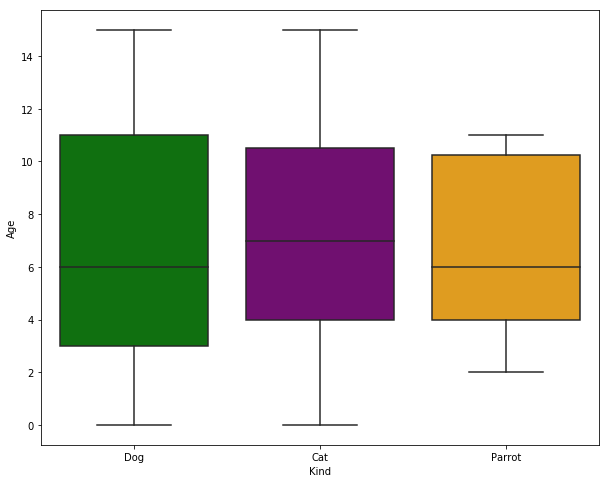

In [49]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(x='Kind',y='Age',data=pets,palette=['#008000','#800080','#FFA500'])